In [1]:
import time
import ROOT
import numpy as np
import pandas as pd
import root_pandas as rpd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from root_pandas import read_root
%run functions.ipynb
%run constants.ipynb

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.
Welcome to JupyROOT 6.14/06


In [2]:
table = np.loadtxt('uploads/Q2.txt',skiprows=0)

In [3]:
Q2 = table[:,0]
xsec = table[:,1]

(array([-25.,   0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 <a list of 10 Text yticklabel objects>)

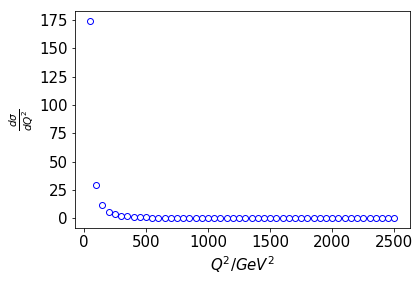

In [4]:
plt.plot(Q2, xsec, 'bo', fillstyle='none')
plt.xlabel('$Q^2 / GeV^2$', fontsize=15)
plt.ylabel(r'$\frac{d\sigma}{dQ^2}$', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [5]:
def getData(inputFiles):
    cols = []
    scalar = []
    scalar.append('evid')
    scalar.append('xsec')
    scalar.append('ntrials')    
    scalar.append('x')
    scalar.append('y')
    scalar.append('Q2')
    scalar.append('W2')
    scalar.append('pt_jet')
    scalar.append('eta_jet')
    scalar.append('phi_jet')
    scalar.append('pt_quark')
    scalar.append('eta_quark')
    scalar.append('phi_quark')
    scalar.append('pt_photon')
    scalar.append('phi_photon')
    scalar.append('eta_electron')
    scalar.append('pt_electron')
    scalar.append('delta_R')
    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print '\n', 'Processed', inputFilename, 'in',  '%2.1f'%(end-start), 'seconds'
    return pd.concat([x for x in dataframes])

In [6]:
files = ["$HOME/EIC/output/102.root"]
a = getData(files)


Processed $HOME/EIC/output/102.root in 67.3 seconds


In [7]:
c = applyCut(a, '0.1 < y < 0.85', '0.1 < y < 0.85')

0.1 < y < 0.85 6783540  fraction kept: 18.7


In [10]:
def plot1d(df, var, low, high, interval, xlabel, yscale, label):

    xvar_array = toArrayFloat(low, high, interval)
    xsec = np.mean(a['xsec'])
    ntrials = a['ntrials'][a.shape[0]-1]
    
    x, hist, xerr = getHist(df, var, xvar_array)
    y = hist*xsec*1e9/(ntrials*interval)
    plt.errorbar(x, y, xerr = xerr, fmt='none', color='b', elinewidth=1, label=label)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.yscale(yscale)
    plt.xlabel(xlabel, fontsize=15)
    
    return y

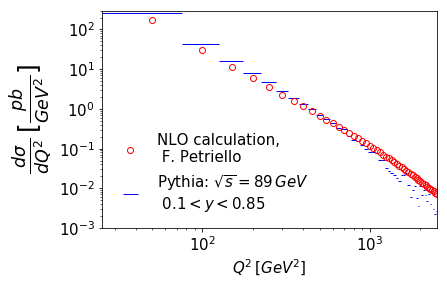

In [12]:
plt.plot(Q2, xsec, 'ro', fillstyle='none', label='NLO calculation, \n F. Petriello')
plt.xscale('log')
plt.yscale('log')
plt.xlim(left=25, right=2500)
plt.ylim(bottom=0.001, top=300)
y = plot1d(c, 'Q2',25,2525,50,'$Q^2 \, [GeV^2]$','log','Pythia: $\sqrt{s} = 89 \, GeV$ \n $0.1 < y < 0.85$')
plt.ylabel(r'$\frac{d\sigma}{dQ^2} \, [\frac{pb}{GeV^{2}}]$', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(prop={'size': 15}, frameon=False, loc='lower left')

In [13]:
ratio = y / xsec

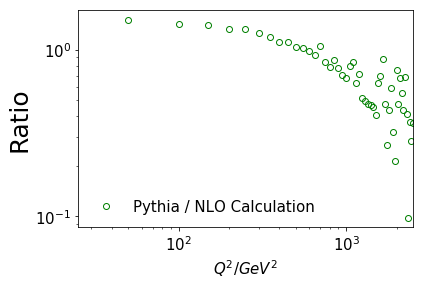

In [16]:
plt.plot(Q2, ratio, 'go', fillstyle='none', label='Pythia / NLO Calculation')
plt.xscale('log')
plt.yscale('log')
plt.xlim(left=25, right=2500)
plt.xlabel('$Q^2 / GeV^2$', fontsize=15)
plt.ylabel('Ratio', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(prop={'size': 15}, frameon=False, loc='lower left')